In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
torch.manual_seed(1)


In [2]:
x_train =[[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6],[1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [3]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [5]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
print(y_one_hot)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [6]:
w = torch.zeros((4,3),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

optimizer = optim.SGD([w,b],lr = 0.1)

In [9]:
nb_epoch = 6000

for epoch in range(nb_epoch + 1):
    hypothesis = F.softmax(x_train.matmul(w) + b,dim = 1)
    
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch,nb_epoch,cost.item()))

Epoch    0 / 6000 Cost : 0.399290
Epoch  100 / 6000 Cost : 0.365709
Epoch  200 / 6000 Cost : 0.333016
Epoch  300 / 6000 Cost : 0.306667
Epoch  400 / 6000 Cost : 0.294459
Epoch  500 / 6000 Cost : 0.285098
Epoch  600 / 6000 Cost : 0.276318
Epoch  700 / 6000 Cost : 0.268061
Epoch  800 / 6000 Cost : 0.260277
Epoch  900 / 6000 Cost : 0.252923
Epoch 1000 / 6000 Cost : 0.245962
Epoch 1100 / 6000 Cost : 0.239362
Epoch 1200 / 6000 Cost : 0.233094
Epoch 1300 / 6000 Cost : 0.227132
Epoch 1400 / 6000 Cost : 0.221454
Epoch 1500 / 6000 Cost : 0.216040
Epoch 1600 / 6000 Cost : 0.210872
Epoch 1700 / 6000 Cost : 0.205932
Epoch 1800 / 6000 Cost : 0.201206
Epoch 1900 / 6000 Cost : 0.196680
Epoch 2000 / 6000 Cost : 0.192342
Epoch 2100 / 6000 Cost : 0.188180
Epoch 2200 / 6000 Cost : 0.184184
Epoch 2300 / 6000 Cost : 0.180344
Epoch 2400 / 6000 Cost : 0.176652
Epoch 2500 / 6000 Cost : 0.173098
Epoch 2600 / 6000 Cost : 0.169677
Epoch 2700 / 6000 Cost : 0.166380
Epoch 2800 / 6000 Cost : 0.163201
Epoch 2900 / 6

In [10]:
w = torch.zeros((4,3),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

optimizer = optim.SGD([w,b],lr = 0.1)

In [11]:
nb_epoch = 6000

for epoch in range(nb_epoch + 1):
    
    z = x_train.matmul(w) + b
    cost = F.cross_entropy(z,y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch,nb_epoch,cost.item()))

Epoch    0 / 6000 Cost : 1.098612
Epoch  100 / 6000 Cost : 0.761050
Epoch  200 / 6000 Cost : 0.689991
Epoch  300 / 6000 Cost : 0.643229
Epoch  400 / 6000 Cost : 0.604117
Epoch  500 / 6000 Cost : 0.568255
Epoch  600 / 6000 Cost : 0.533922
Epoch  700 / 6000 Cost : 0.500291
Epoch  800 / 6000 Cost : 0.466908
Epoch  900 / 6000 Cost : 0.433507
Epoch 1000 / 6000 Cost : 0.399962
Epoch 1100 / 6000 Cost : 0.366378
Epoch 1200 / 6000 Cost : 0.333642
Epoch 1300 / 6000 Cost : 0.307042
Epoch 1400 / 6000 Cost : 0.294653
Epoch 1500 / 6000 Cost : 0.285279
Epoch 1600 / 6000 Cost : 0.276489
Epoch 1700 / 6000 Cost : 0.268222
Epoch 1800 / 6000 Cost : 0.260429
Epoch 1900 / 6000 Cost : 0.253066
Epoch 2000 / 6000 Cost : 0.246098
Epoch 2100 / 6000 Cost : 0.239491
Epoch 2200 / 6000 Cost : 0.233216
Epoch 2300 / 6000 Cost : 0.227248
Epoch 2400 / 6000 Cost : 0.221565
Epoch 2500 / 6000 Cost : 0.216146
Epoch 2600 / 6000 Cost : 0.210973
Epoch 2700 / 6000 Cost : 0.206028
Epoch 2800 / 6000 Cost : 0.201298
Epoch 2900 / 6

In [12]:
model = nn.Linear(4,3)

optimizer = optim.SGD(model.parameters(),lr = 0.1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction,y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch,nb_epoch,cost.item()))

Epoch    0 / 6000 Cost : 1.616785
Epoch  100 / 6000 Cost : 0.658891
Epoch  200 / 6000 Cost : 0.573443
Epoch  300 / 6000 Cost : 0.518151
Epoch  400 / 6000 Cost : 0.473265
Epoch  500 / 6000 Cost : 0.433516
Epoch  600 / 6000 Cost : 0.396563
Epoch  700 / 6000 Cost : 0.360914
Epoch  800 / 6000 Cost : 0.325392
Epoch  900 / 6000 Cost : 0.289179
Epoch 1000 / 6000 Cost : 0.254148


In [13]:
#===================================================================#

In [14]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
        
    def forward(self,x):
        return self.linear(x)


model = SoftmaxClassifierModel()

In [17]:
optimizer = optim.SGD(model.parameters(),lr = 0.1)

nb_epochs = 10000

for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction,y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10000 == 0:
        print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch,nb_epochs,cost.item()))

Epoch    0 / 10000 Cost : 0.020581
Epoch 10000 / 10000 Cost : 0.013719


In [20]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

print("다음 기기로 학습합니다 :",device)

다음 기기로 학습합니다 : cpu


In [21]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
training_epochs = 30
batch_size = 100

In [22]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',train = True, transform = transforms.ToTensor(),download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',train = False, transform = transforms.ToTensor(),download = True)


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



D:\anaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [23]:
data_loader = DataLoader(dataset =mnist_train, batch_size = batch_size,shuffle = True,drop_last = True)

In [33]:
linear = nn.Linear(784,10,bias = True).to(device)

criterion =nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for x,y in data_loader:
        
        x = x.view(-1,28*28).to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(x)
        cost = criterion(hypothesis,y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:','%04d' % (epoch + 1),'cost =','{:.9f}'.format(avg_cost))

print('Learing')

Epoch: 0001 cost = 0.536267519
Epoch: 0002 cost = 0.358625889
Epoch: 0003 cost = 0.330814183
Epoch: 0004 cost = 0.316112041
Epoch: 0005 cost = 0.306813151
Epoch: 0006 cost = 0.299845397
Epoch: 0007 cost = 0.294825405
Epoch: 0008 cost = 0.290664494
Epoch: 0009 cost = 0.287341297
Epoch: 0010 cost = 0.284192026
Epoch: 0011 cost = 0.281761825
Epoch: 0012 cost = 0.279679626
Epoch: 0013 cost = 0.277516603
Epoch: 0014 cost = 0.275792509
Epoch: 0015 cost = 0.274091214
Learing


Accuracy: 0.8859000205993652
7302
Label : 8
Prediction :  8


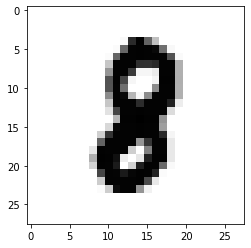

In [38]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction,1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:',accuracy.item())
    
    r = random.randint(0,len(mnist_test) - 1)
    print(r)
    x_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label :',y_single_data.item())
    single_prediction = linear(x_single_data)
    print('Prediction : ',torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

